Seção inalterada:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm

def plotConfusionMatrix(classifier,X_test,y_test,y_pred,class_names):
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    return ;


path_tweet_set = 'data/SemEval2018-T3-train-taskA.txt'

corpus_tweets = pd.read_csv(path_tweet_set,encoding="utf8",sep='\t')

labels = corpus_tweets['Label'].unique()

print(corpus_tweets.shape)

print(corpus_tweets.head())

print(labels)

vectorizer = TfidfVectorizer(norm=None, stop_words="english",max_df=0.95, min_df=2)
tfidf = vectorizer.fit_transform(corpus_tweets['Tweet text'])

#print(vectorizer.get_feature_names())
print(tfidf.shape)

X = tfidf;
y = corpus_tweets['Label'];

testsizev = [0.2, 0.3, 0.4]
gammav = [0.0001, 'auto', 'scale']
reports = []

(3817, 3)
   Tweet index  Label                                         Tweet text
0            1      1  Sweet United Nations video. Just in time for C...
1            2      1  @mrdahl87 We are rumored to have talked to Erv...
2            3      1  Hey there! Nice to see you Minnesota/ND Winter...
3            4      0                3 episodes left I'm dying over here
4            5      1  I can't breathe! was chosen as the most notabl...
[1 0]
(3817, 3427)


Código principal utilizado:

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       758
           1       0.61      0.66      0.63       769

    accuracy                           0.62      1527
   macro avg       0.62      0.62      0.62      1527
weighted avg       0.62      0.62      0.62      1527

Confusion matrix for MLP: 
[[436 322]
 [263 506]]
Confusion matrix, without normalization
[[436 322]
 [263 506]]
Normalized confusion matrix
[[436 322]
 [263 506]]


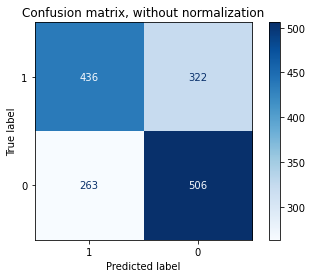

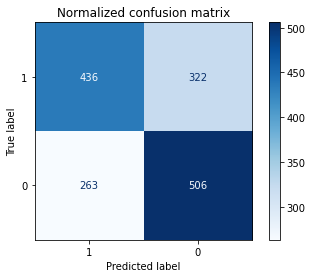

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

svm_clf = svm.SVC(kernel='rbf',gamma=0.0001,C=20)

#Resultados semelhantes:
#svm_clf = svm.SVC(kernel='rbf',gamma='scale',C=20)

svm_clf.fit(X_train, y_train)
y_true, y_pred = y_test, svm_clf.predict(X_test)

print(classification_report(y_true, y_pred))
print("Confusion matrix for MLP: ")
print(confusion_matrix(y_true, y_pred))

plotConfusionMatrix(svm_clf,X_test,y_test,y_pred,labels)

Randomizando os conjuntos de teste e treinamento:

In [3]:
import random

totalacc = 0
totalmacro = 0
totalweighted = 0
ntestes = 30

for teste in range(0, ntestes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random.randint(0, 100000))
    
    svm_clf = svm.SVC(kernel='rbf',gamma=0.0001,C=20)
    
    svm_clf.fit(X_train, y_train)
    y_true, y_pred = y_test, svm_clf.predict(X_test)
    report = classification_report(y_true, y_pred, output_dict=True)
    totalacc += report['accuracy']
    totalmacro += report['macro avg']['f1-score']
    totalweighted += report['weighted avg']['f1-score']
    
print("Accuracy: %.2f" %(totalacc/ntestes))
print("Macro avg: %.2f" %(totalmacro/ntestes))
print("Weighted avg: %.2f" %(totalweighted/ntestes))

Accuracy: 0.63
Macro avg: 0.62
Weighted avg: 0.62
